# Data analysis of pcitures

I this notebook we aim to develop understanding of what makes up visually a healthy and un healthy leaf

In [9]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

In [2]:
base_dir = './cherry-leaves/'
train_dir = os.path.join(base_dir, 'training/')

# Load training dirs for samples
train_healthy_dir = os.path.join(train_dir, 'healthy')
train_sick_dir = os.path.join(train_dir, 'sick')


In [3]:
train_healthy_fnames = os.listdir( train_healthy_dir )
train_sick_fnames = os.listdir( train_sick_dir )

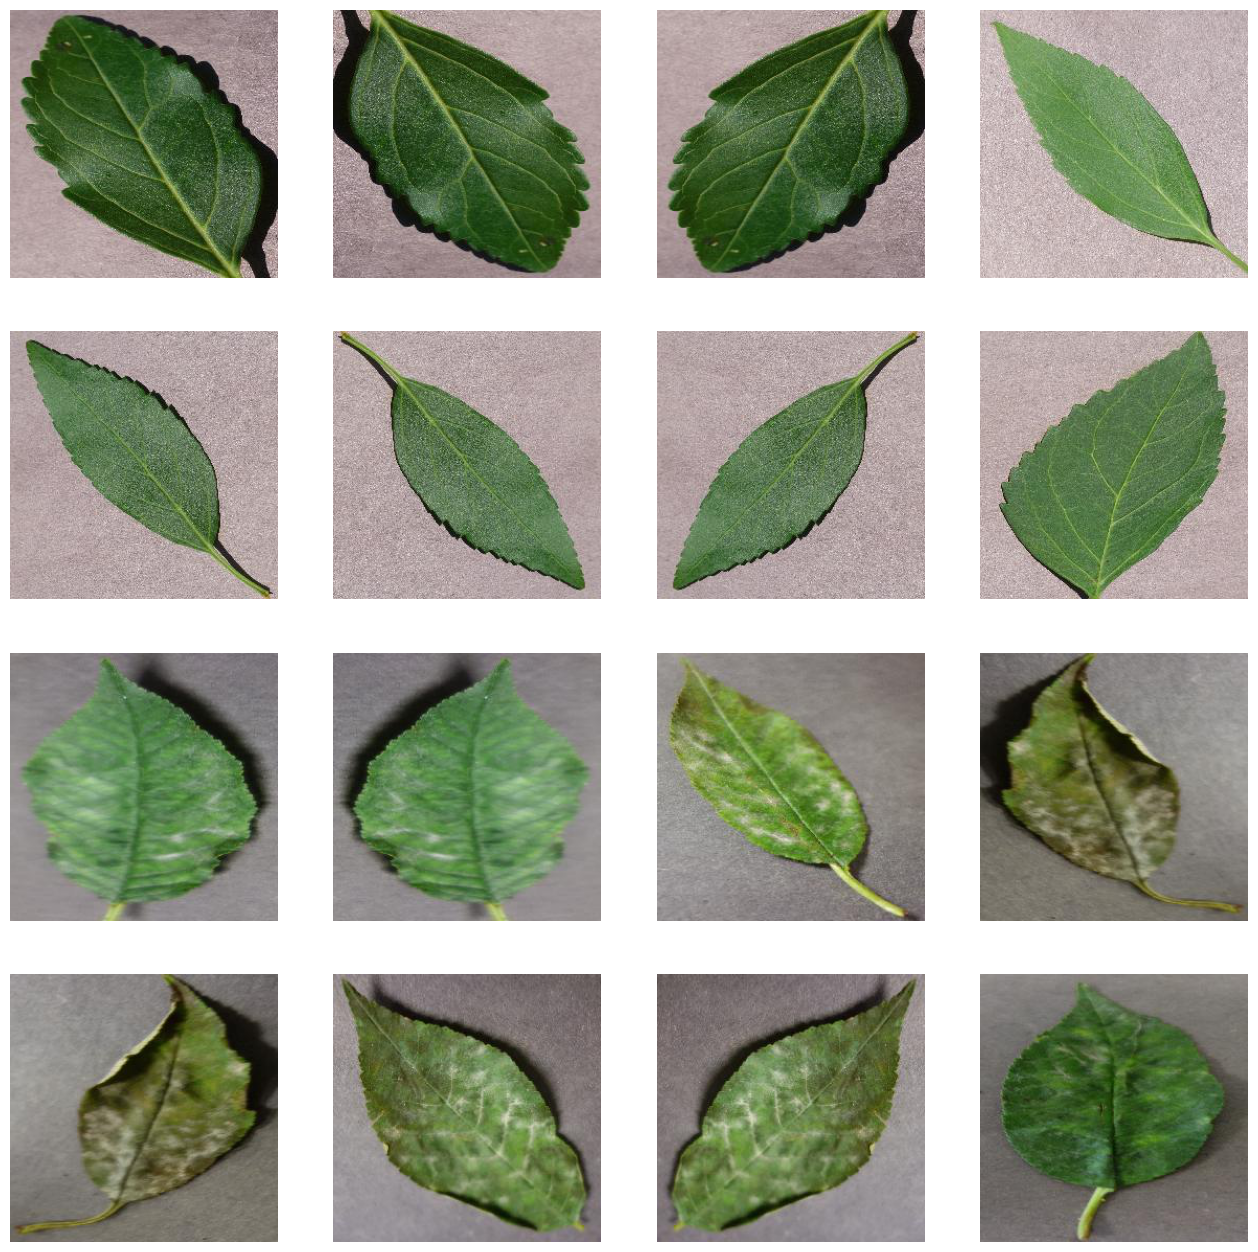

In [4]:
nrows = 4
ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_healthy_pics = [os.path.join(train_healthy_dir, fname) 
                for fname in train_healthy_fnames[ pic_index-8:pic_index] 
               ]

next_sick_pics = [os.path.join(train_sick_dir, fname) 
                for fname in train_sick_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_healthy_pics+next_sick_pics):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Figure shows collage of healthy and un healthy leaves with the top two rows consisting of healthy leaves and the last two unhealthy.

from visual inspection on average it can be seen that:
- healthy leaves have a consistant shape 
- healthy leaves have less white spots 
- healthy leaves have a deeper green color 

In [23]:

datagen = ImageDataGenerator(rescale=1./255)

leaves_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=20,
    class_mode='binary')


Found 3786 images belonging to 2 classes.


In [24]:
def segregate_images(generator):
    sick_images = []
    healthy_images = []
    
    for images, labels in generator:
        for i in range(images.shape[0]):
            if labels[i] == 0:  # assuming '0' is the label for 'sick'
                sick_images.append(images[i])
            else:  # assuming '1' is the label for 'healthy'
                healthy_images.append(images[i])
                
        # break the loop once all images are processed
        if generator.batch_index == 0:
            break

    return np.array(sick_images), np.array(healthy_images)

sick_images, healthy_images = segregate_images(leaves_gen)

sick_avg = np.mean(sick_images, axis=0)
sick_var = np.std(sick_images, axis=0)

healthy_avg = np.mean(healthy_images, axis=0)
healthy_var = np.std(healthy_images, axis=0)

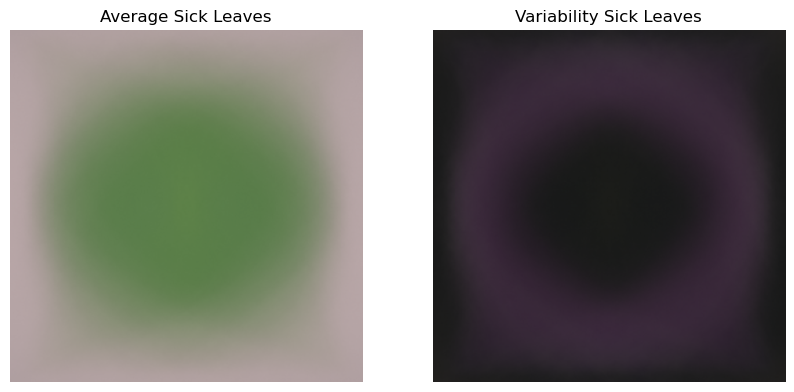

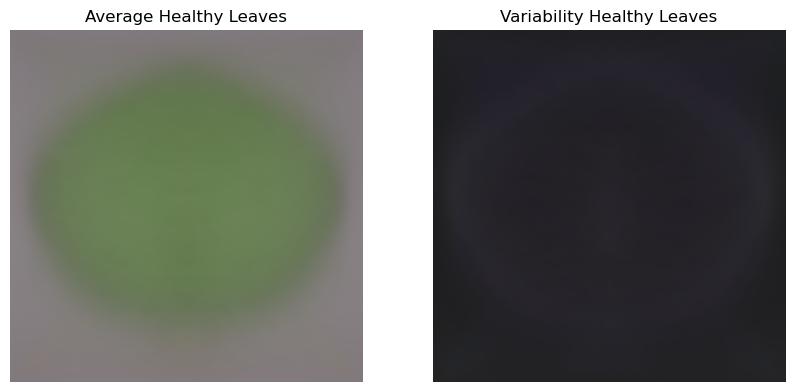

In [25]:
def plot_images(avg_image, var_image, title):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(avg_image)
    ax[0].set_title(f"Average {title}")
    ax[0].axis("off")

    ax[1].imshow(var_image)
    ax[1].set_title(f"Variability {title}")
    ax[1].axis("off")

    plt.show()

plot_images(sick_avg, sick_var, "Sick Leaves")
plot_images(healthy_avg, healthy_var, "Healthy Leaves")


The figure above shows the average mean and variance of sick and healthy leaves
from this we can understand :
- There is greater variation in sick leaves than healty
- on average healthy leaves are brighter than unhealty leaves 